## <center> Non Linear Regression  </center>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

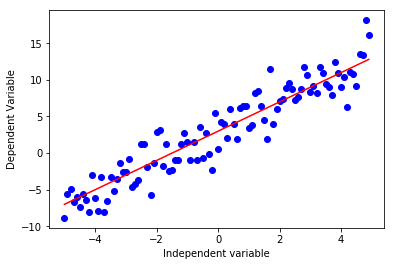

In [13]:
x = np.arange(-5.0, 5.0, 0.1 )
x
#making a linear graph
y = 2*x + 3
y_noise = 2*np.random.normal(size = x.size) #random smapling #draw random sample from normal distribution
y_noise  # just to create a non linear data we do this

ydata = y + y_noise
plt.plot(x, ydata, "bo")
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent Variable")
plt.show()

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

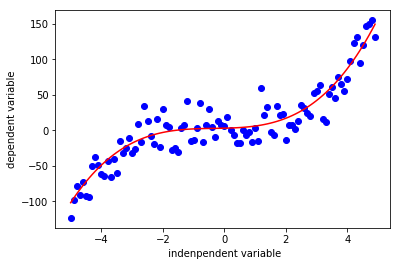

In [16]:
x = np.arange(-5, 5, 0.1)
#cubic equation
y = 1 * (x**3) + 1 * (x**2) + 1 * x + 3
ynoise = 20 * np.random.normal(size = x.size)
ydata = y + ynoise
plt.plot(x, ydata, "bo")
plt.plot(x,y, "r")
plt.xlabel(" indenpendent variable")
plt.ylabel("dependent variable")
plt.show()

## Quadratic Equation
$$ Y = X^2 $$

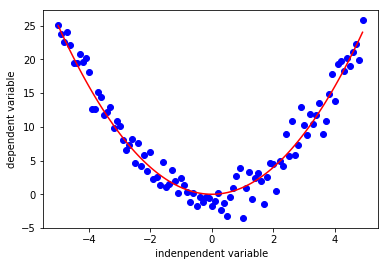

In [20]:
x = np.arange(-5,5,0.1)

y = np.power(x,2)
ynoise = 2 * np.random.normal(size = x.size)
ydata = y + ynoise

plt.plot(x, ydata, "bo")
plt.plot(x,y, "r")
plt.xlabel(" indenpendent variable")
plt.ylabel("dependent variable")
plt.show()

### Exponential Function 

Exponential function can be defined as $$ Y = a+bc^X $$ where a and b ≠ 0 and c>0 


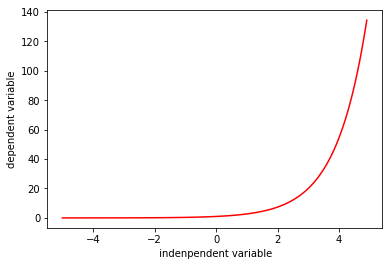

In [21]:
x = np.arange(-5,5,0.1)
y = np.exp(x)

plt.plot(x,y, "r")
plt.xlabel(" indenpendent variable")
plt.ylabel("dependent variable")
plt.show()

In [23]:
import numpy as np
import pandas as pd
 
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Regression

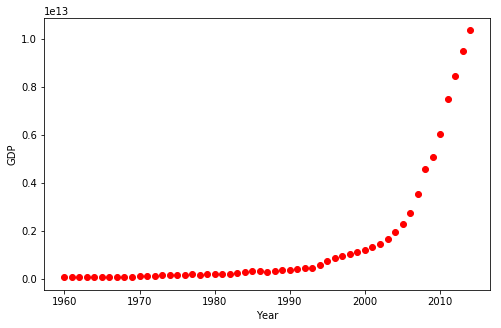

In [34]:
plt.figure(figsize=(8,5))

x_data, y_data = (df["Year"].values, df.Value.values)

plt.plot(x_data, y_data, "ro")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

In [32]:
print (type(df.Year.values))
print (type(df.Year))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


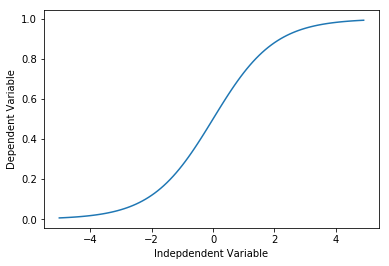

In [35]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()



The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [46]:
def sigmoid (x, beta_1, beta_2):
    y = 1/ (1+ np.exp(-beta_1 * ( x-beta_2)))
    return y

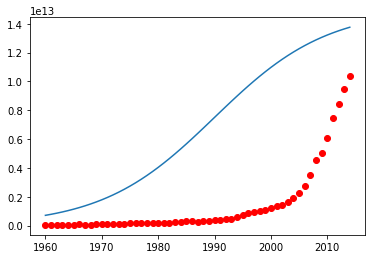

In [49]:
beta_1 = 0.1
beta_2 = 1990
x_data = df.Year.values
Y_pred = sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, "ro")

In [50]:
# Lets transfer our data to a smaller range
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. It returns an array, so called __popt__, which consists of optimal values for the parameters so that the sum of the squared residuals of __sigmoid(xdata, *popt) - ydata__ is minimized.

In [51]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


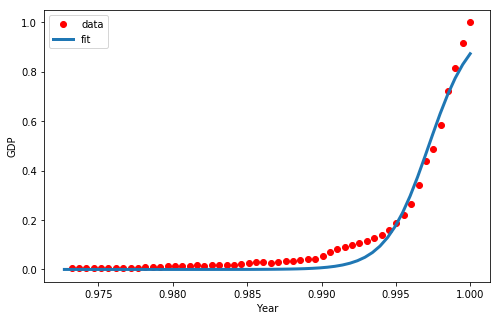

In [52]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()